# Análise de Qualidade e Potabilidade da Água

---

Este notebook utiliza um dataset que contém medições e avaliações de qualidade da água relacionadas à **potabilidade**, ou seja, a adequação da água para consumo humano. O objetivo principal é fornecer insights sobre os parâmetros de qualidade da água e auxiliar na determinação se a água é potável ou não.

Cada linha no dataset representa uma amostra de água com atributos específicos, e a coluna **`Potability`** indica se a água é adequada para consumo.

---

## Colunas do Dataset:

* **`pH`**: O nível de pH da água.
* **`Hardness`**: Dureza da água, uma medida do conteúdo mineral.
* **`Solids`**: Total de sólidos dissolvidos na água.
* **`Chloramines`**: Concentração de cloraminas na água.
* **`Sulfate`**: Concentração de sulfato na água.
* **`Conductivity`**: Condutividade elétrica da água.
* **`Organic_carbon`**: Conteúdo de carbono orgânico na água.
* **`Trihalomethames`**: Concentração de trihalometanos na água.
* **`Turbidity`**: Nível de turbidez, uma medida da clareza da água.
* **`Potability`**: Variável alvo; indica a potabilidade da água com valores **1 (potável)** e **0 (não potável)**.

---

## Objetivo e Tarefa de Machine Learning:

O principal objetivo deste dataset é **avaliar e prever a potabilidade da água** com base nesses atributos. Ele é útil para uma tarefa de **classificação binária supervisionada**, onde modelos de Machine Learning podem ser treinados para classificar amostras de água como potáveis (1) ou não potáveis (0).





In [ ]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("uom190346a/water-quality-and-potability")
csv_file_path = f"{path}/water_potability.csv"

try:
    df = pd.read_csv(csv_file_path)
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: O arquivo {csv_file_path} não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Dataset carregado com sucesso!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [ ]:
#tem muitos valores nulos nas colunas de ph, sulfate e trihalomethanes
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
target = df["Potability"].copy()
target.value_counts()

,count
Potability,
0,1998
1,1278


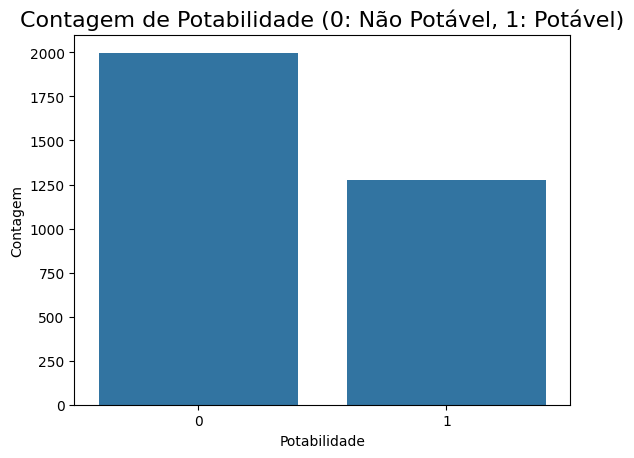

In [ ]:
sns.countplot(x=target)
plt.title('Contagem de Potabilidade (0: Não Potável, 1: Potável)', fontsize=16)
plt.xlabel('Potabilidade')
plt.ylabel('Contagem')
plt.show()

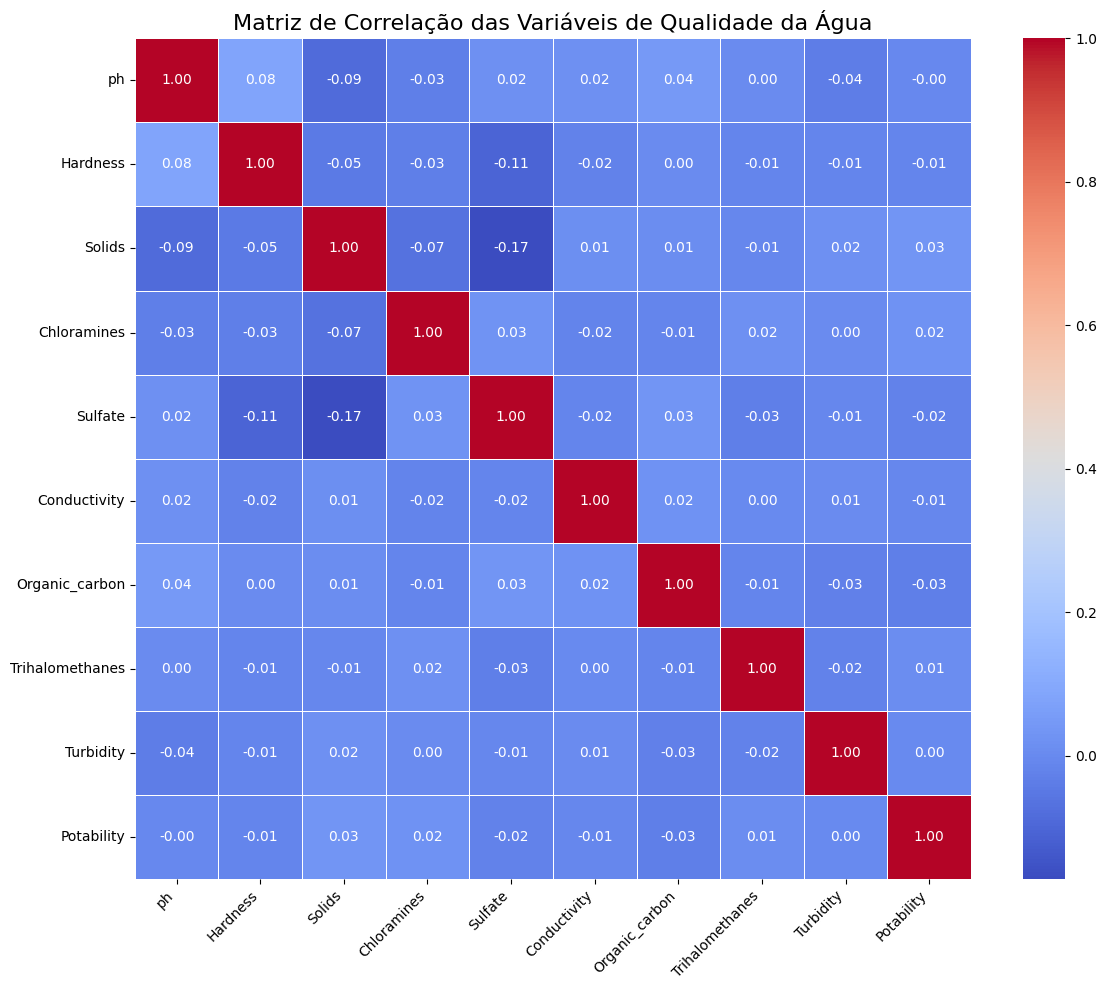

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5
)
plt.title('Matriz de Correlação das Variáveis de Qualidade da Água', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

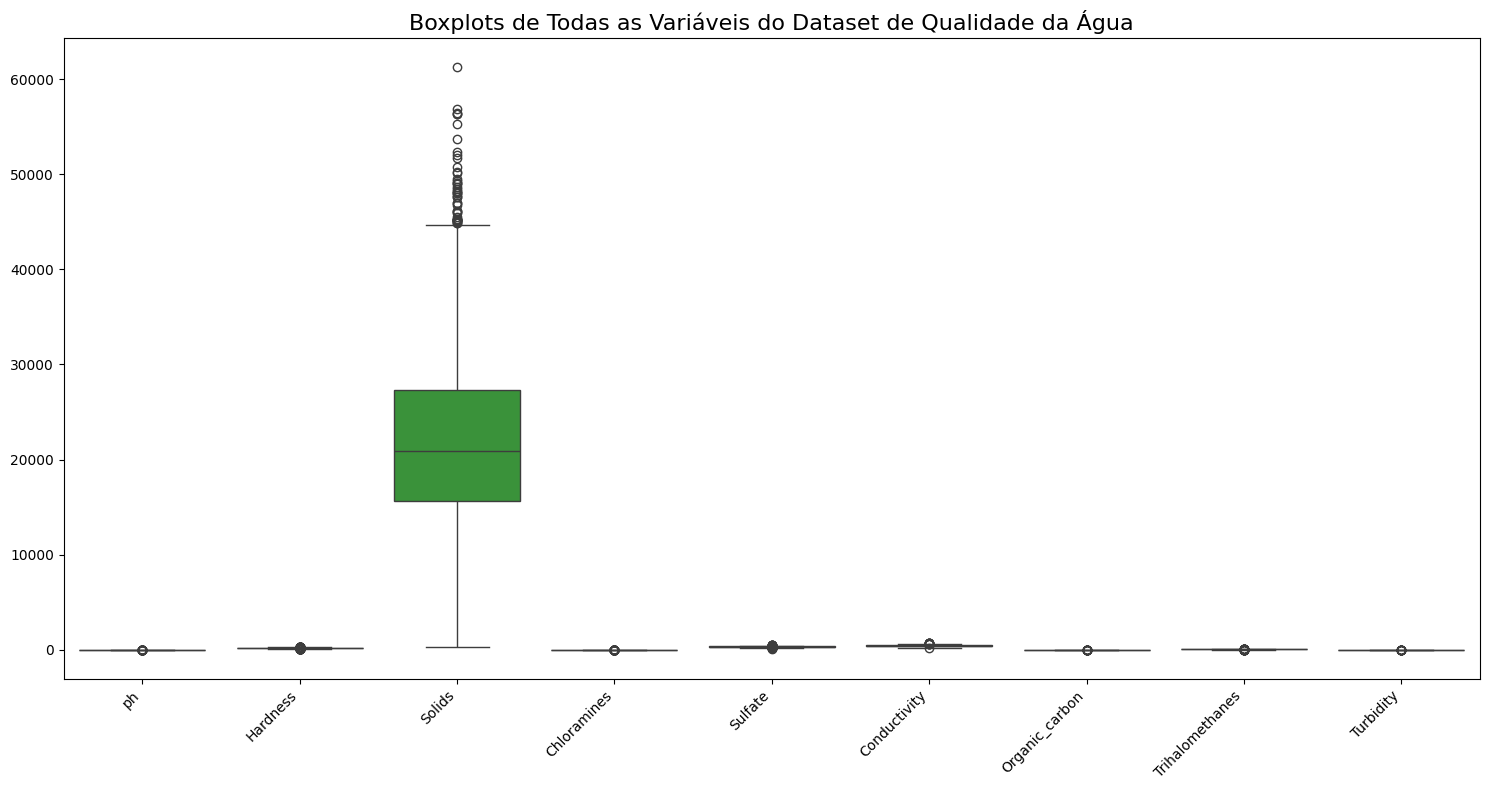

In [ ]:
import matplotlib.pyplot as plt


df_for_boxplot = df.drop(columns=["Potability"]).copy()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_for_boxplot)
plt.title('Boxplots de Todas as Variáveis do Dataset de Qualidade da Água', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#muitos outliers e valores descrepantes, tem que aplicar algumma técnica de normalização

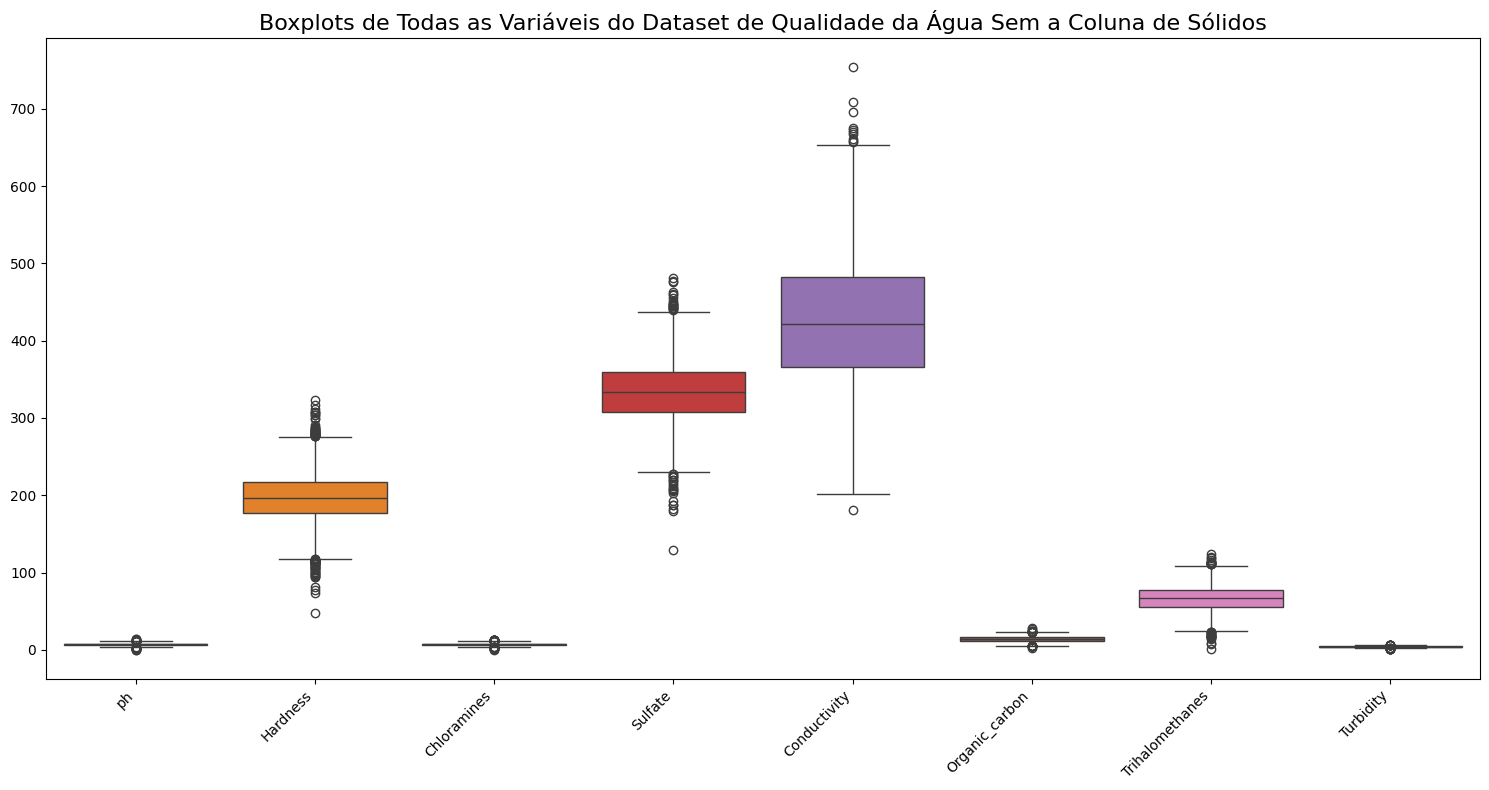

In [ ]:
df_for_boxplot = df.drop(columns=["Potability", "Solids"]).copy()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_for_boxplot)
plt.title('Boxplots de Todas as Variáveis do Dataset de Qualidade da Água Sem a Coluna de Sólidos', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#df_non_null = df.dropna().copy()
#df_imputed_knn.isnull().sum()

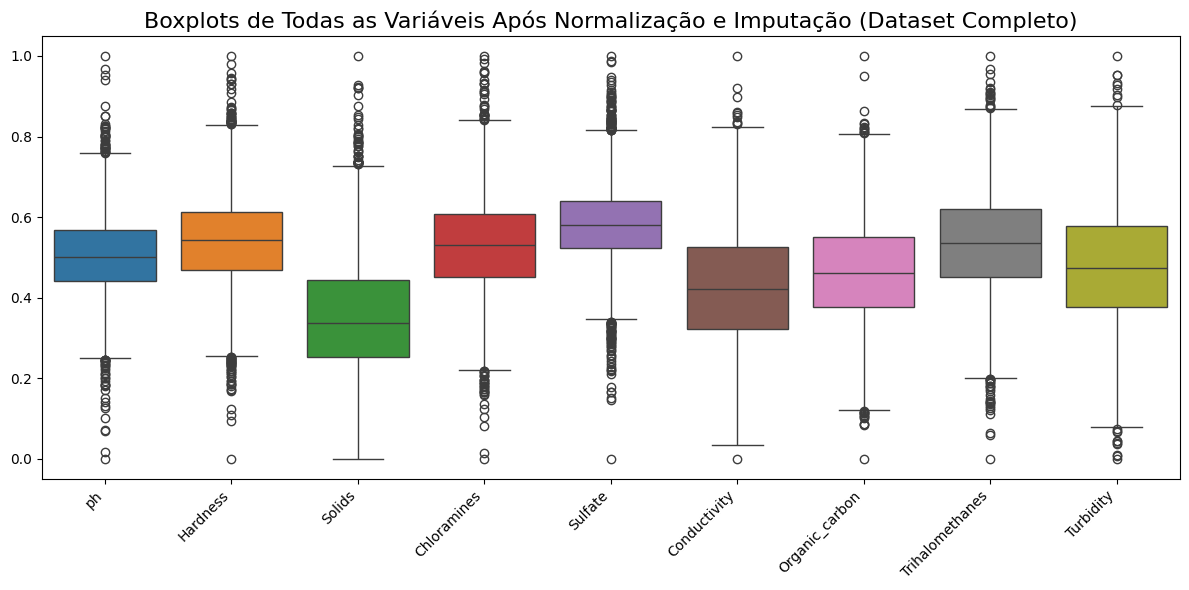

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Potability"]).copy()
y = df["Potability"].copy()

columns_og = X.columns

scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors=5)

X = scaler.fit_transform(X)
X = imputer.fit_transform(X)

df_processado = pd.DataFrame(X, columns=columns_og)
df_processado['Potability'] = y

# visualização
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_processado.drop(columns=['Potability']))
plt.title('Boxplots de Todas as Variáveis Após Normalização e Imputação (Dataset Completo)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df_processado.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,0.505206,0.539648,0.356781,0.530510,0.581111,0.427217,0.462858,0.532988,0.476159,0.500000
std,0.102441,0.117639,0.143259,0.122223,0.106573,0.139449,0.125061,0.126055,0.144672,0.500063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.445261,0.469453,0.253303,0.454536,0.522560,0.323607,0.379001,0.454521,0.378779,0.000000
50%,0.502834,0.541289,0.338403,0.530739,0.579785,0.420386,0.458800,0.534822,0.473240,0.500000
75%,0.563972,0.611863,0.443601,0.606605,0.639672,0.523343,0.548165,0.614898,0.576206,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
new_df = df.dropna()
target = new_df["Potability"].copy()

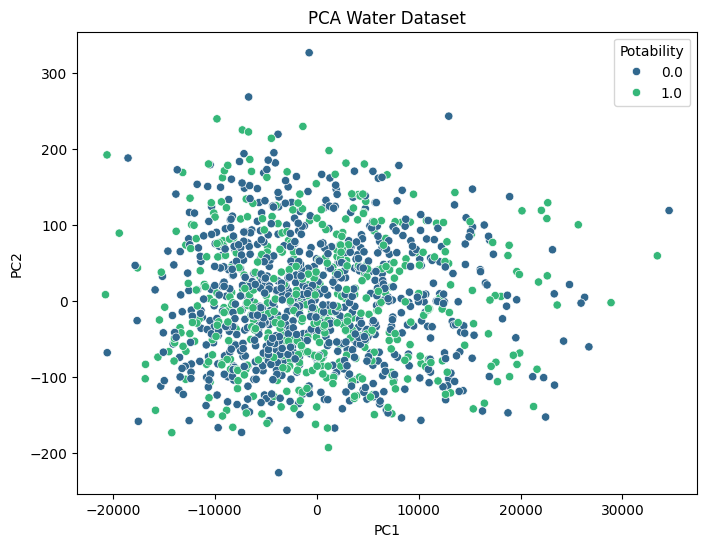

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(new_df.drop(columns=['Potability']))

df_pca = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
df_pca["Potability"]= target

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Potability', data=df_pca, palette='viridis')
plt.title('PCA Water Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

tg_ravel = np.ravel(target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
dtypes: float64(9)
memory usage: 230.5 KB


# Algoritmos

In [ ]:
import time
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def knn_model(k):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_knn)
    return accuracy_score(y_test, y_pred_knn), cm

best_k = []
acuracias = []
matrizes_conf = []

start_time = time.time()

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    best_accuracy_knn = 0
    best_k_knn = 0
    best_cm = None
    for k in range(1, 30, 2):
        accuracy_knn, cm = knn_model(k)
        if best_accuracy_knn < accuracy_knn:
            best_accuracy_knn = accuracy_knn
            best_k_knn = k
            best_cm = cm

    best_k.append(best_k_knn)
    acuracias.append(best_accuracy_knn)
    matrizes_conf.append(best_cm)

print("--- KNN ---")
print(f"Execução total em: {time.time() - start_time:.2f} segundos")
print(f"\nMelhor valor modal para k: {stats.mode(best_k).mode}")
acuracia_media = np.mean(acuracias)
acuracia_std = np.std(acuracias)
print(f"\nAcurácia Média: {acuracia_media:.4f} (Desvio Padrão: {acuracia_std:.4f})")

matrizes_conf_media_knn = np.mean(matrizes_conf, axis=0)
print("\nMatriz de Confusão Média (arredondada):")
print(np.round(matrizes_conf_media_knn).astype(int))

--- KNN ---
Execução total em: 20.17 segundos

Melhor valor modal para k: 27

Acurácia Média: 0.6484 (Desvio Padrão: 0.0153)

Matriz de Confusão Média (arredondada):
[[357  42]
 [189  68]]


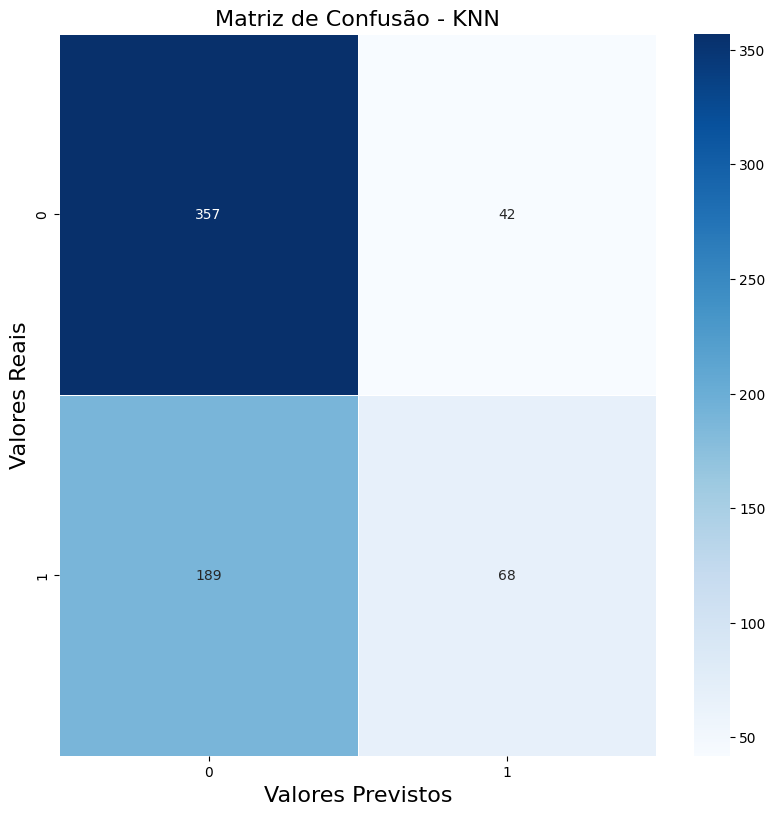

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(
    np.round(matrizes_conf_media_knn).astype(int), annot=True, fmt='d', cmap='Blues', linewidths=.5
)
plt.title('Matriz de Confusão - KNN', fontsize=16)
plt.tight_layout()
plt.xlabel('Valores Previstos', fontsize=16)
plt.ylabel('Valores Reais', fontsize=16)
plt.show()

In [ ]:
import time
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

def nb_model(smoothing_value):
    nb = GaussianNB(var_smoothing=smoothing_value)
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_nb)
    return accuracy_score(y_test, y_pred_nb), cm

best_var = []
acuracias = []
matrizes_conf = []

start_time = time.time()
smoothing_range = np.logspace(0, -9, num=100)

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    best_accuracy_nb = 0
    best_smoothing_nb = 0
    best_cm_nb = None

    for smoothing in smoothing_range:
        accuracy_nb, cm = nb_model(smoothing)
        if best_accuracy_nb < accuracy_nb:
            best_accuracy_nb = accuracy_nb
            best_smoothing_nb = smoothing
            best_cm_nb = cm

    best_var.append(best_smoothing_nb)
    acuracias.append(best_accuracy_nb)
    matrizes_conf.append(best_cm_nb)

print("--- NB ---")
print(f"Execução total em: {time.time() - start_time:.2f} segundos")
print(f"\nMelhor valor modal para var_smoothing: {stats.mode(best_k).mode:.2f}")
acuracia_media = np.mean(acuracias)
acuracia_std = np.std(acuracias)
print(f"\nAcurácia Média: {acuracia_media:.4f} (Desvio Padrão: {acuracia_std:.4f})")

matrizes_conf_media_nb = np.mean(matrizes_conf, axis=0)
print("\nMatriz de Confusão Média (arredondada):")
print(np.round(matrizes_conf_media_nb).astype(int))

--- NB ---
Execução total em: 13.03 segundos

Melhor valor modal para var_smoothing: 27.00

Acurácia Média: 0.6315 (Desvio Padrão: 0.0142)

Matriz de Confusão Média (arredondada):
[[379  21]
 [221  36]]


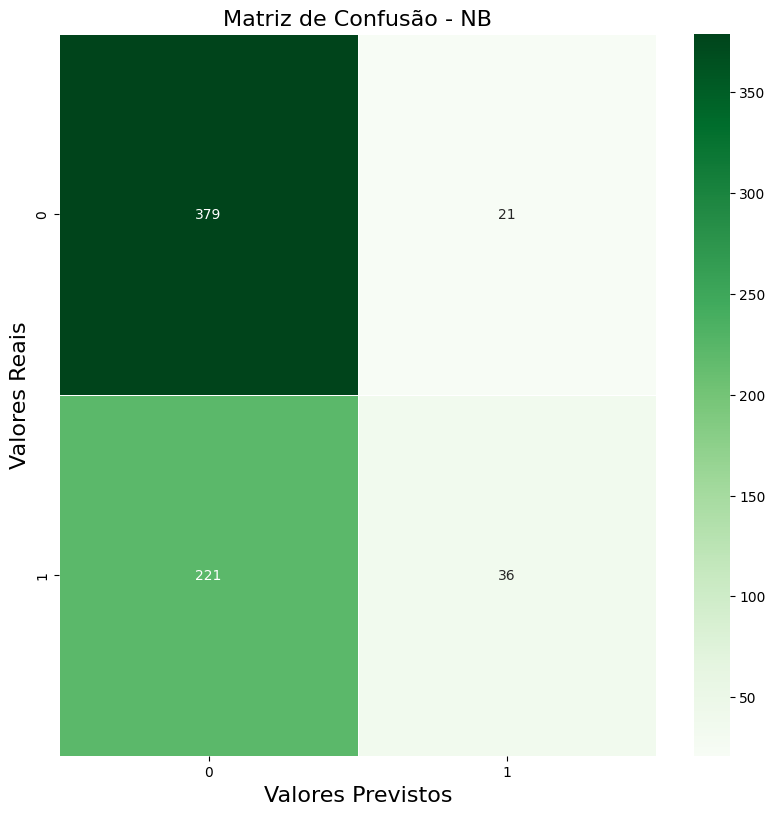

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(
    np.round(matrizes_conf_media_nb).astype(int), annot=True, fmt='d', cmap='Greens', linewidths=.5
)
plt.title('Matriz de Confusão - NB', fontsize=16)
plt.tight_layout()
plt.xlabel('Valores Previstos', fontsize=16)
plt.ylabel('Valores Reais', fontsize=16)
plt.show()

In [ ]:
import time
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def decision_tree_model(depth):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_dt)
    return accuracy_score(y_test, y_pred_dt), cm, dt

best_prof = []
acuracias = []
matrizes_conf = []
importancias_features = []

start_time = time.time()
depth_range = range(1, 31)

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    best_accuracy_dt = 0
    best_depth_dt = 0
    best_cm_dt = None
    best_model_dt = None

    for depth in depth_range:
        accuracy_dt, cm, model = decision_tree_model(depth)
        if best_accuracy_dt < accuracy_dt:
            best_accuracy_dt = accuracy_dt
            best_depth_dt = depth
            best_cm_dt = cm
            best_model_dt = model

    best_prof.append(best_depth_dt)
    acuracias.append(best_accuracy_dt)
    matrizes_conf.append(best_cm_dt)
    importancias_features.append(best_model_dt.feature_importances_)

print("--- Decision Tree ---")
print(f"Execução total em: {time.time() - start_time:.2f} segundos")

print(f"\nMelhor profundidade modal: {stats.mode(best_prof).mode:.2f}")

acuracia_media = np.mean(acuracias)
acuracia_std = np.std(acuracias)
print(f"\nAcurácia Média: {acuracia_media:.4f} (Desvio Padrão: {acuracia_std:.4f})")

matriz_conf_media_dt = np.mean(matrizes_conf, axis=0)
print("\nMatriz de Confusão Média (arredondada):")
print(np.round(matriz_conf_media_dt).astype(int))

media_importancias = np.mean(importancias_features, axis=0)
importancia_series = pd.Series(media_importancias, index=columns_og)

print("\nImportância Média das Variáveis:")
print(importancia_series.sort_values(ascending=False))

--- Decision Tree ---
Execução total em: 46.07 segundos

Melhor profundidade modal: 6.00

Acurácia Média: 0.6479 (Desvio Padrão: 0.0152)

Matriz de Confusão Média (arredondada):
[[357  43]
 [188  68]]

Importância Média das Variáveis:
Sulfate            0.232664
ph                 0.229858
Chloramines        0.129854
Solids             0.127983
Hardness           0.119251
Conductivity       0.044839
Trihalomethanes    0.041973
Turbidity          0.040034
Organic_carbon     0.033545
dtype: float64


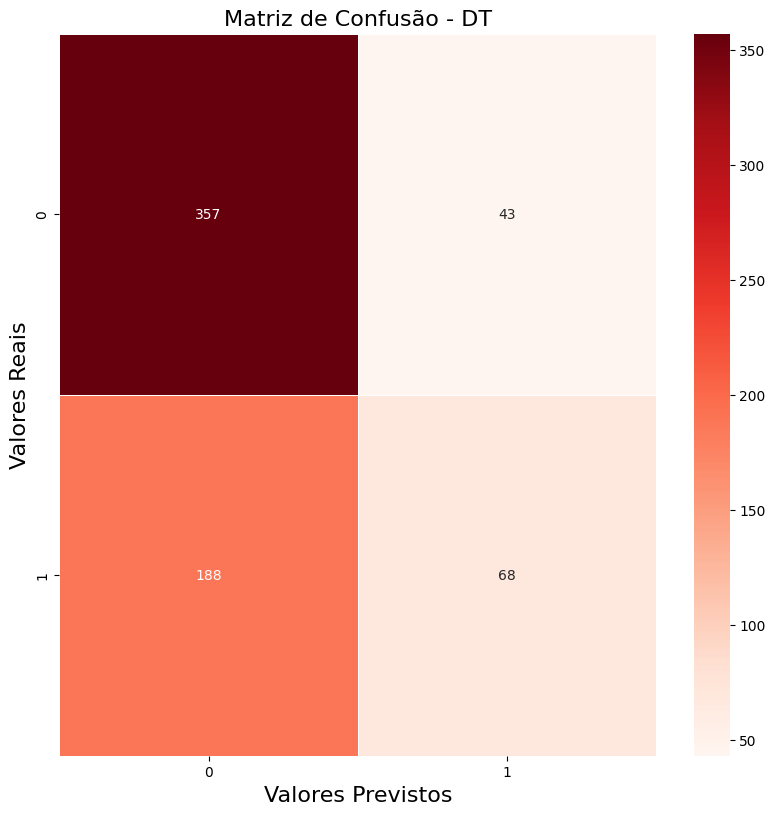

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(
    np.round(matriz_conf_media_dt).astype(int), annot=True, fmt='d', cmap='Reds', linewidths=.5
)
plt.title('Matriz de Confusão - DT', fontsize=16)
plt.tight_layout()
plt.xlabel('Valores Previstos', fontsize=16)
plt.ylabel('Valores Reais', fontsize=16)
plt.show()

In [ ]:
import time
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

def svm_model(c_param):
    model = SVC(kernel='rbf', C=c_param, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy_score(y_test, y_pred), cm

best_c = []
acuracias = []
matrizes_conf = []

start_time = time.time()
c_range = [0.01, 0.1, 1, 10, 100]

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    best_accuracy_svm = 0
    best_c_svm = 0
    best_cm_svm = None

    for c_value in c_range:
        accuracy_svm, cm = svm_model(c_value)
        if best_accuracy_svm < accuracy_svm:
            best_accuracy_svm = accuracy_svm
            best_c_svm = c_value
            best_cm_svm = cm

    best_c.append(best_c_svm)
    acuracias.append(best_accuracy_svm)
    matrizes_conf.append(best_cm_svm)

print("--- SVM ---")
print(f"Execução total em: {time.time() - start_time:.2f} segundos")

print(f"\nMelhor valor modal para c: {stats.mode(best_c).mode:.2f}")

acuracia_media = np.mean(acuracias)
acuracia_std = np.std(acuracias)
print(f"\nAcurácia Média: {acuracia_media:.4f} (Desvio Padrão: {acuracia_std:.4f})")

matriz_conf_media_svm = np.mean(matrizes_conf, axis=0)
print("\nMatriz de Confusão Média (arredondada):")
print(np.round(matriz_conf_media_svm).astype(int))

--- SVM ---
Execução total em: 97.12 segundos

Melhor valor modal para c: 1.00

Acurácia Média: 0.6746 (Desvio Padrão: 0.0139)

Matriz de Confusão Média (arredondada):
[[364  36]
 [178  79]]


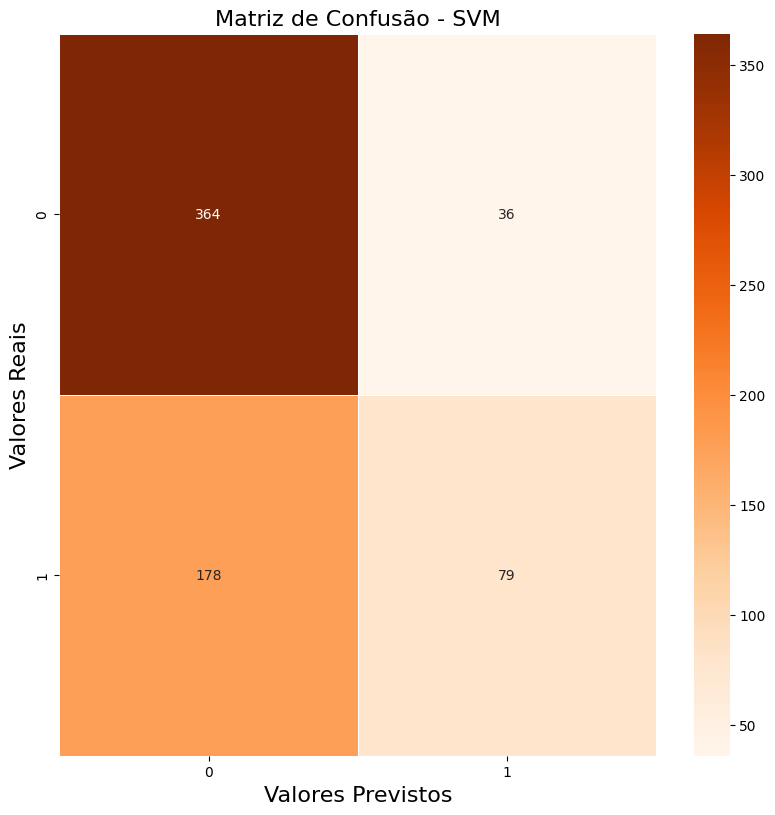

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(
    np.round(matriz_conf_media_svm).astype(int), annot=True, fmt='d', cmap='Oranges', linewidths=.5
)
plt.title('Matriz de Confusão - SVM', fontsize=16)
plt.tight_layout()
plt.xlabel('Valores Previstos', fontsize=16)
plt.ylabel('Valores Reais', fontsize=16)
plt.show()

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def mlp_model(layers):
    mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_mlp)
    return accuracy_score(y_test, y_pred_mlp), cm

arqs = [(50,), (100,), (50, 50), (100, 50), (100, 100)]

best_arqs = []
acuracias = []
matrizes_conf = []

start_time = time.time()

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    best_accuracy_mlp = 0
    best_arq_mlp = None
    best_cm_mlp = None

    for arq in arqs:
        accuracy_mlp, cm = mlp_model(arq)
        if best_accuracy_mlp < accuracy_mlp:
            best_accuracy_mlp = accuracy_mlp
            best_arq_mlp = arq
            best_cm_mlp = cm

    best_arqs.append(best_arq_mlp)
    acuracias.append(best_accuracy_mlp)
    matrizes_conf.append(best_cm_mlp)

print("--- MLP ---")
print(f"Execução total em: {time.time() - start_time:.2f} segundos")

best_arq_str = [str(arq) for arq in best_arqs]
moda_arq = pd.Series(best_arq_str).mode()[0]

print(f"\nMelhor arquitetura modal: {moda_arq}")

acuracia_media = np.mean(acuracias)
acuracia_std = np.std(acuracias)
print(f"\nAcurácia Média: {acuracia_media:.4f} (Desvio Padrão: {acuracia_std:.4f})")

matriz_conf_media_mlp = np.mean(matrizes_conf, axis=0)
print("\nMatriz de Confusão Média (arredondada):")
print(np.round(matriz_conf_media_mlp).astype(int))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


--- MLP ---
Execução total em: 623.26 segundos

Melhor arquitetura modal: (50,)

Acurácia Média: 0.6810 (Desvio Padrão: 0.0163)

Matriz de Confusão Média (arredondada):
[[357  42]
 [167  90]]


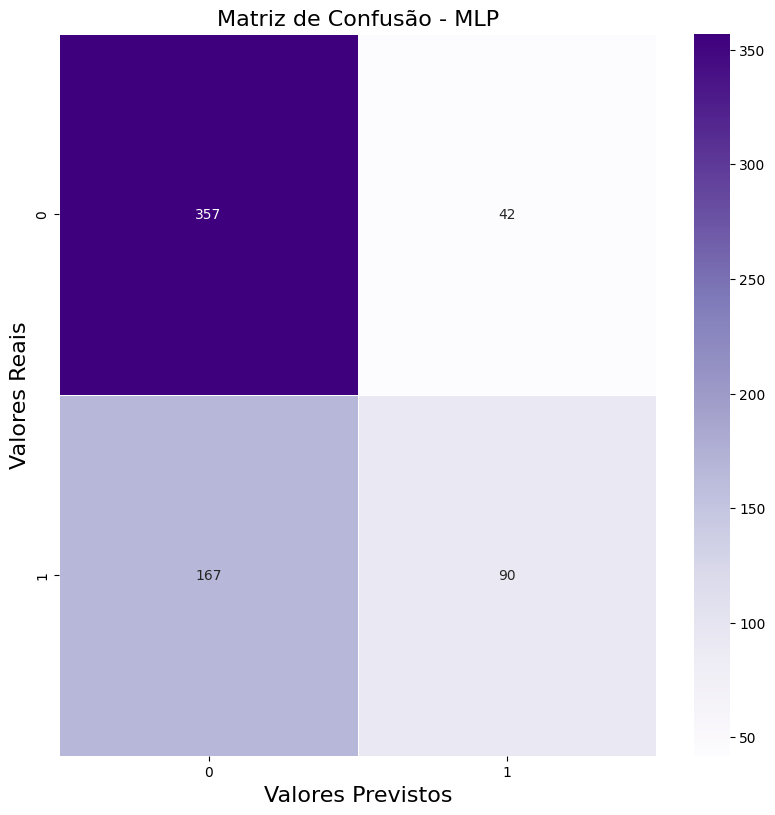

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.heatmap(
    np.round(matriz_conf_media_mlp).astype(int), annot=True, fmt='d', cmap='Purples', linewidths=.5
)
plt.title('Matriz de Confusão - MLP', fontsize=16)
plt.tight_layout()
plt.xlabel('Valores Previstos', fontsize=16)
plt.ylabel('Valores Reais', fontsize=16)
plt.show()